In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from mpl_toolkits.mplot3d import Axes3D

import joblib
# Load the Iris dataset for reference (to get flower names)
iris = load_iris()

# Load the trained model
model = joblib.load("iris_rf_model.pkl")

# Load the new samples (assuming these are from the CSV file you generated)
new_samples = pd.read_csv("iris_new_samples.csv")

# Make predictions using the trained model
predictions = model.predict(new_samples.to_numpy())

# Map numeric predictions to flower names
predicted_flowers = iris.target_names[predictions]

# Add the predicted flowers to the DataFrame
new_samples['Predicted Flower'] = predicted_flowers


Pair plot visualization

Predicted flower types: [0 1 2]


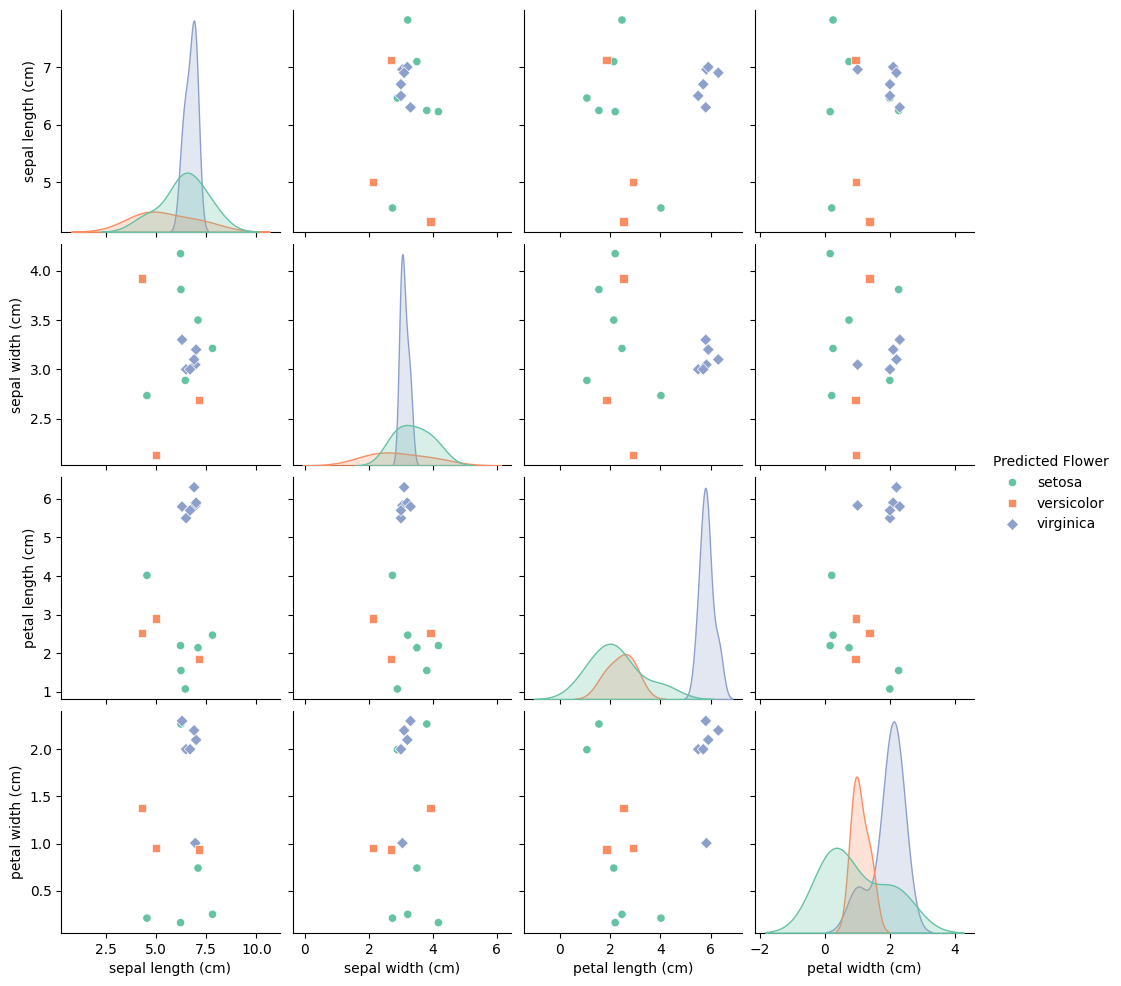

In [7]:
# Optionally, load true labels for the new samples
# If you had true labels, you could map them similarly, but here we just use predictions.
new_samples['True Flower'] = predicted_flowers  # Assuming true labels are unknown and same as predictions for now

# Create a pairplot
sns.pairplot(new_samples, hue='Predicted Flower', palette='Set2', markers=["o", "s", "D"])
# Check the unique predicted flower types
print("Predicted flower types:", pd.unique(predictions))

# Show the plot
plt.show()


Visualizing Predicted vs. True Labels

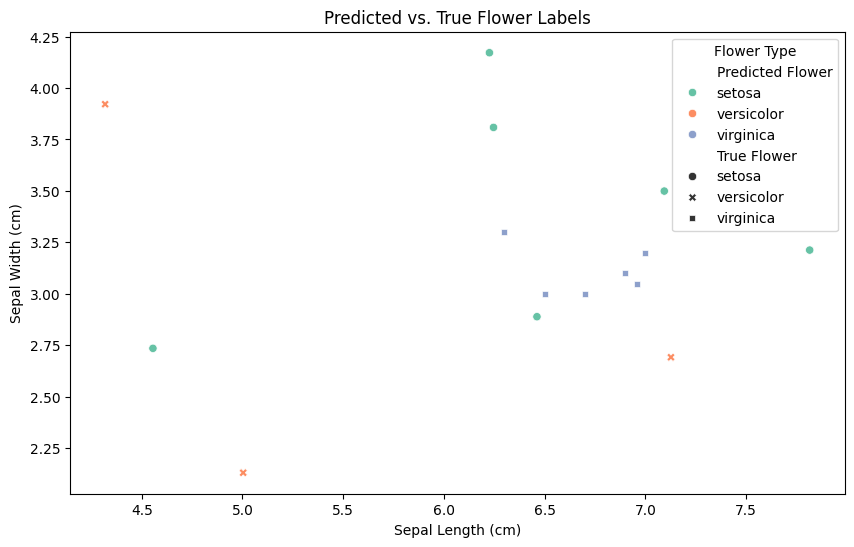

In [8]:
# Add true labels (assuming you have them; otherwise, just compare predicted labels)
true_labels = iris.target_names[predictions]  # Replace this with actual true labels if you have them
new_samples['True Flower'] = true_labels

# Scatter plot of predicted vs true labels
plt.figure(figsize=(10, 6))

sns.scatterplot(data=new_samples, x='sepal length (cm)', y='sepal width (cm)', hue='Predicted Flower', style='True Flower', palette='Set2')

# Add labels and title
plt.title("Predicted vs. True Flower Labels")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.legend(title='Flower Type')
plt.show()


#3d plotting

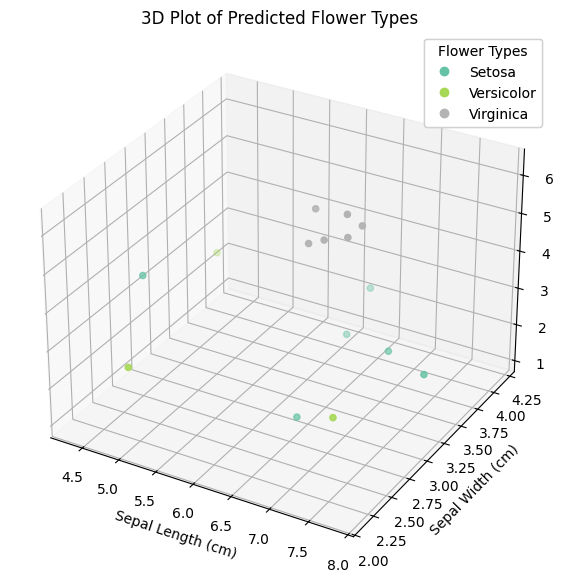

In [13]:

# Assume you have a DataFrame `new_samples` with features and predicted flower names
# new_samples has columns: 'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'Predicted Flower'

# Convert predicted flower names to numerical values for color mapping
flower_map = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
new_samples['Predicted Flower Numeric'] = new_samples['Predicted Flower'].map(flower_map)

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the points, color them based on the predicted flower type
scatter = ax.scatter(new_samples['sepal length (cm)'], 
                     new_samples['sepal width (cm)'], 
                     new_samples['petal length (cm)'], 
                     c=new_samples['Predicted Flower Numeric'], 
                     cmap='Set2', marker='o')

# Set labels for the axes
ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Sepal Width (cm)')
ax.set_zlabel('Petal Length (cm)')
ax.set_title('3D Plot of Predicted Flower Types')

# Add a color bar to indicate the class mapping
legend1 = ax.legend(handles=scatter.legend_elements()[0], labels=['Setosa', 'Versicolor', 'Virginica'], title="Flower Types")
ax.add_artist(legend1)

# Show the plot
plt.show()